In [1]:
from ml_mmpa import master_functions
import pandas as pd

RDKit WARNING: [13:46:51] Enabling RDKit 2019.09.2 jupyter extensions


In [9]:
# carry out mmpa

# clean mmpa
    # first step is making sure the length of the core is longer (more heavy atoms) than either of the transform hands
    # Second step is finding unique transforms and calculating paired t-test
    # Third step is filtering p-val based on thresold and deciding weather to keep both positive and negative transforms
    
# prodcue functions for mmpa
# summarise results in a table

### MMPA

In [1]:
import sys

def abc(xyz):
    print(xyz)

if __name__ == "__main__":
    abc(sys.argv[1])

-f


In [2]:
# in the console run: 

! ./ml_mmpa/master_mmpa.sh test_data/test_data.csv test

# it will result in new items in the 'out' folder.


Importing libraries
initializing mmpa on: test_3
first columns should be smiles:  Smiles
Second column should be property:  pMIC
saving property file:  out/test_3_property.csv
Adding property back into index       
Found pairs:  77
100%|████████████████████████████████████████| 77/77 [00:00<00:00, 23484.69it/s]
saving final file:  out/index_test_3_final.csv


In [2]:
# Next we process that output:

output = pd.read_csv('out/index_test_final.csv')

In [3]:
output

,compound_structure_A,compound_structure_B,idsmiles_A,idsmiles_B,smirks,common_core,measurement_A,measurement_B,measurement_delta,LHS,RHS
0,CCOC(=O)/C(=C\Nc1cc(Br)c(OC)c(Br)c1)c1ccc(Cl)cc1,CCOC(=O)/C(=C\Nc1cc(Br)c(OC)c(Br)c1)c1ccc(OC)cc1,9235,5712,[*:1]c1ccc(Cl)cc1>>[*:1]c1ccc(OC)cc1,[*:1]/C(=C/Nc1cc(Br)c(OC)c(Br)c1)C(=O)OCC,4.00,3.99,-0.01,[*:1]c1ccc(Cl)cc1,[*:1]c1ccc(OC)cc1
1,O=C1CNC(=O)/C1=C(\NC1CCCCC1)c1cccc2ccccc12,O=C1CNC(=O)/C1=C(\NCc1ccccc1)c1cccc2ccccc12,1385,4315,[*:1]NC1CCCCC1>>[*:1]NCc1ccccc1,[*:1]/C(=C1/C(=O)CNC1=O)c1cccc2ccccc12,4.02,4.03,0.01,[*:1]NC1CCCCC1,[*:1]NCc1ccccc1
2,O=C1CNC(=O)/C1=C(\NC1CCCCC1)c1cccc2ccccc12,O=C1CNC(=O)/C1=C(\NCc1ccccc1)c1cccc2ccccc12,1385,9440,[*:1]NC1CCCCC1>>[*:1]NCc1ccccc1,[*:1]/C(=C1/C(=O)CNC1=O)c1cccc2ccccc12,4.02,4.03,0.01,[*:1]NC1CCCCC1,[*:1]NCc1ccccc1
3,O=C1CNC(=O)/C1=C(\NC1CCCCC1)c1cccc2ccccc12,O=C1CNC(=O)/C1=C(\NCc1ccccc1)c1cccc2ccccc12,6971,4315,[*:1]NC1CCCCC1>>[*:1]NCc1ccccc1,[*:1]/C(=C1/C(=O)CNC1=O)c1cccc2ccccc12,4.02,4.03,0.01,[*:1]NC1CCCCC1,[*:1]NCc1ccccc1
4,O=C1CNC(=O)/C1=C(\NC1CCCCC1)c1cccc2ccccc12,O=C1CNC(=O)/C1=C(\NCc1ccccc1)c1cccc2ccccc12,6971,9440,[*:1]NC1CCCCC1>>[*:1]NCc1ccccc1,[*:1]/C(=C1/C(=O)CNC1=O)c1cccc2ccccc12,4.02,4.03,0.01,[*:1]NC1CCCCC1,[*:1]NCc1ccccc1
...,...,...,...,...,...,...,...,...,...,...,...
111264,O=c1c2ccccc2sn1C1CCCCC1,Cc1ccc(-n2sc3ccccc3c2=O)cc1,9901,7233,[*:1]C1CCCCC1>>[*:1]c1ccc(C)cc1,[*:1]n1sc2ccccc2c1=O,3.67,3.68,0.01,[*:1]C1CCCCC1,[*:1]c1ccc(C)cc1
111265,O=c1c2ccccc2sn1Cc1ccc2c(c1)OCO2,O=c1c2ccccc2sn1Cc1ccccc1,7278,9900,[*:1]Cc1ccc2c(c1)OCO2>>[*:1]Cc1ccccc1,[*:1]n1sc2ccccc2c1=O,3.76,3.68,-0.08,[*:1]Cc1ccc2c(c1)OCO2,[*:1]Cc1ccccc1
111266,O=c1c2ccccc2sn1C1CCCCC1,O=c1c2ccccc2sn1Cc1ccc2c(c1)OCO2,9901,7278,[*:1]C1CCCCC1>>[*:1]Cc1ccc2c(c1)OCO2,[*:1]n1sc2ccccc2c1=O,3.67,3.76,0.09,[*:1]C1CCCCC1,[*:1]Cc1ccc2c(c1)OCO2
111267,O=c1c2ccccc2sn1C1CCCCC1,O=c1c2ccccc2sn1Cc1ccccc1,9901,9900,[*:1]C1CCCCC1>>[*:1]Cc1ccccc1,[*:1]n1sc2ccccc2c1=O,3.67,3.68,0.01,[*:1]C1CCCCC1,[*:1]Cc1ccccc1


In [3]:
# first step is making sure the length of the core is longer (more heavy atoms) than either of the transform hands

output_len = master_functions.clean_mmpa_pairs_len(output) # filter pairs by len LHS & RHS vs CORE

Initial number of transofrms: 111269 
Number fo transforms disqualified based on length discrepancy: 5974 
Remaining number of transforms: 105295


In [4]:
'''
Second step is finding unique transforms and calculating paired t-test
It will produce dataframe with columns: smirks	dof	t-stat	p-val (t-test)	measurement_delta	std	sem
Sorted by descending dof

At this point both positive and negative transforms are present.
'''
output_len_stat = master_functions.stat_it_2(output_len)

Number of unique transforms: 8938 
Processing transforms:...
 
1000
2000
3000
4000
5000
6000
7000
8000
done!


In [5]:
output_len_stat

,smirks,dof,t-stat,p-val (t-test),measurement_delta,std,sem
0,[*:1]C>>[*:1][H],1052,7.063949,2.938877e-12,0.188386,0.865395,0.026669
1,[*:1]F>>[*:1][H],430,-0.540194,5.893426e-01,-0.027077,1.040596,0.050124
2,[*:1]Cl>>[*:1][H],270,0.700202,4.844038e-01,0.036605,0.860604,0.052278
3,[*:1]C>>[*:1]CC,262,0.518719,6.043943e-01,0.032357,1.011624,0.062379
4,[*:1]OC>>[*:1][H],239,0.483007,6.295327e-01,0.022292,0.714981,0.046152
...,...,...,...,...,...,...,...
8933,[*:1][C@@H](N)C(=O)NC1CCN([*:2])C1>>[*:1][C@H]...,2,12.241379,6.607215e-03,1.183333,0.167432,0.096667
8934,[*:1]N1CCC(C)(CN)C1>>[*:1]N1C[C@H](N(C)C)[C@H]1C,2,-3.282609,8.160434e-02,-1.006667,0.531162,0.306667
8935,[*:1]N1CCCCC1=O>>[*:1]n1cnnc1,2,1.200000,3.530034e-01,0.480000,0.692820,0.400000
8936,[*:1]N1CC(N)C1C>>[*:1]N1C[C@@H](N)[C@H](N)C1,2,-4.150000,5.345087e-02,-1.660000,0.692820,0.400000


In [6]:
'''
Third step is filtering p-val based on thresold and deciding weather to keep both positive and negative transforms
'''

mmpa_zero_neg_pos = master_functions.zero_in(output_len_stat, 0.05, pos_only=False)


Number of unique transforms where p-val < 0.05 is 3255


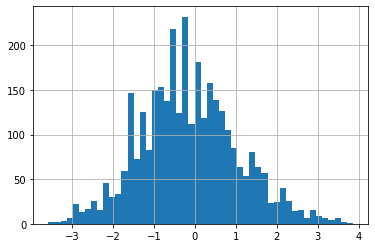

In [8]:
mmpa_zero_neg_pos.measurement_delta.hist(bins=50)

In [9]:
mmpa_zero_neg_pos

,smirks,dof,t-stat,p-val (t-test),measurement_delta,std,sem
0,[*:1]N1CCC2NC(=O)OC2C1>>[*:1]N1CC[C@H](N)C1,2,14.405218,4.784480e-03,3.856667,0.463717,0.267727
1,[*:1]CC1CN([*:2])CC/C1=N\OC>>[*:1][C@H]1CCN([*...,2,8.241833,1.440420e-02,3.656667,0.768462,0.443672
2,[*:1]/C(N)=N\OC>>[*:1]CN,11,22.028236,1.891645e-10,3.614167,0.568354,0.164070
3,[*:1]N1CCC2NC(=O)OC2C1>>[*:1]N1CC[C@@H](N)C1,2,13.172619,5.713748e-03,3.526667,0.463717,0.267727
4,[*:1]/C(N)=N\OC>>[*:1]N,6,9.227650,9.142470e-05,3.455714,0.990822,0.374496
...,...,...,...,...,...,...,...
3250,[*:1]N1CCC([C@@H](C)N)C1>>[*:1]N1CCC2NC(=O)OC2C1,2,-12.238833,6.609937e-03,-3.276667,0.463717,0.267727
3251,[*:1]C=C>>[*:1]c1cccc(OC)c1OC,2,-34.100000,8.588779e-04,-3.410000,0.173205,0.100000
3252,[*:1]C([*:2])([*:3])C>>[*:1]Cc1cc(Cl)c(O[*:2])...,2,-11.400000,7.606987e-03,-3.420000,0.519615,0.300000
3253,[*:1]C1=CCNCC1>>[*:1]N1CCC2NC(=O)OC2C1,2,-13.135268,5.746009e-03,-3.516667,0.463717,0.267727
